In [13]:
from sklearn import svm, metrics
import glob, os.path, re, json
#glob = 

files = glob.glob("./samples/ch4/lang/train/*.txt")
train_data=[]
train_label=[]
for file_name in files:
    basename = os.path.basename(file_name)
    
    #파일 별로 label 따내기
    lang = basename.split("-")[0]
    
    #with는 file open, close 동시에
    file = open(file_name, "r", encoding="utf-8")
    text = file.read()
    text = text.lower()
    file.close()
    
    # 알파벳 출현 빈도 구하기
    code_a = ord("a")
    code_z = ord("z")
    
    count = [0 for n in range(0,26)]
    
    for character in text:
        code_current = ord(character)
        if code_a <= code_current <= code_z:
            count[code_current - code_a]+=1
    
    #count 정규화 필요(0~1)
    
    total = sum(count)
    #map(함수, 리스트), 리스트가 함수로 전해짐
    count = list(map(lambda n: n/total, count))
    
    train_label.append(lang)
    train_data.append(count)

#이번엔 test
files = glob.glob("./samples/ch4/lang/test/*.txt")
test_data=[]
test_label=[]
for file_name in files:
    basename = os.path.basename(file_name)
    
    #파일 별로 label 따내기
    lang = basename.split("-")[0]
    
    #with는 file open, close 동시에
    file = open(file_name, "r", encoding="utf-8")
    text = file.read()
    text = text.lower()
    file.close()
    
    # 알파벳 출현 빈도 구하기
    code_a = ord("a")
    code_z = ord("z")
    
    count = [0 for n in range(0,26)]
    
    for character in text:
        code_current = ord(character)
        if code_a <= code_current <= code_z:
            count[code_current - code_a]+=1
    
    #count 정규화 필요(0~1)
    
    total = sum(count)
    #map(함수, 리스트), 리스트가 함수로 전해짐
    count = list(map(lambda n: n/total, count))
    
    test_label.append(lang)
    test_data.append(count)    

#알파벳 빈도로 언어 예측 학습 부분

clf = svm.SVC()
clf.fit(train_data, train_label)
predict = clf.predict(test_data)
score = metrics.accuracy_score(test_label,predict)

print("정확도: ", score)
#출력할때 편함.
report = metrics.classification_report(test_label, predict)
print("--- report ---")
print(report)

정확도:  0.875
--- report ---
             precision    recall  f1-score   support

         en       0.67      1.00      0.80         2
         fr       1.00      1.00      1.00         2
         id       1.00      0.50      0.67         2
         tl       1.00      1.00      1.00         2

avg / total       0.92      0.88      0.87         8



{'en': [0.07595212187159957, 0.012840043525571273, 0.04570184983677911, 0.04613710554951034, 0.10533188248095757, 0.015669205658324265, 0.019151251360174103, 0.043743199129488576, 0.07399347116430903, 0.0017410228509249185, 0.00544069640914037, 0.05375408052230685, 0.026332970620239392, 0.07747551686615888, 0.08966267682263329, 0.016539717083786723, 0.0, 0.07769314472252448, 0.061371055495103376, 0.08052230685527748, 0.02589771490750816, 0.009793253536452665, 0.014145810663764961, 0.0006528835690968443, 0.02002176278563656, 0.0004352557127312296], 'fr': [0.07873813798409848, 0.010451397794306233, 0.037253141831238776, 0.053282893049499874, 0.15048730443703515, 0.016222108232880224, 0.01070787381379841, 0.015516799179276737, 0.069376763272634, 0.0023082841754295974, 0.004103616311874839, 0.07027442934085663, 0.026801744036932546, 0.07219799948704796, 0.04917927673762503, 0.026032315978456014, 0.005898948448320082, 0.07508335470633495, 0.07162092844319057, 0.07758399589638369, 0.05347525

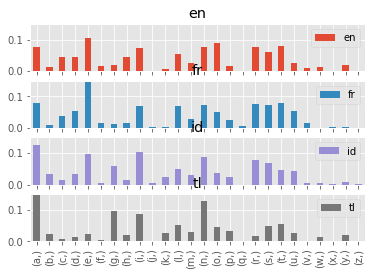

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

#그래프 준비
graph_dict = {}
for i in range(0, len(train_label)):
    label = train_label[i]
    data = train_data[i]
    
    if not (label in graph_dict):
        graph_dict[label] = data
        
asclist = [[chr(n) for n in range(97,97+26)]]
print(graph_dict)
df = pd.DataFrame(graph_dict, index = asclist)

#그래프 그리기
plt.style.use('ggplot')
df.plot(kind="bar", subplots=True, ylim=(0,0.15))
plt.savefig("lang-plot.png")